In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from statsmodels.api import OLS, add_constant
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [6]:
spy = yf.download('SPY', start='2015-01-01', end='2022-11-11')['Adj Close']
spy.name = 'SPY'
spy_ret = np.log(spy/spy.shift(1)).dropna()
spy_ret

[*********************100%***********************]  1 of 1 completed


Date
2015-01-02   -0.000535
2015-01-05   -0.018225
2015-01-06   -0.009464
2015-01-07    0.012384
2015-01-08    0.017589
                ...   
2022-11-04    0.014291
2022-11-07    0.009520
2022-11-08    0.005381
2022-11-09   -0.020817
2022-11-10    0.053497
Name: SPY, Length: 1980, dtype: float64

In [41]:
spx_comp = pd.read_csv('./data/spx_data.csv', header=[0, 1], index_col=0, parse_dates=True)
spx_comp_close = spx_comp['Adj Close']
spx_comp_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,38.203907,50.814621,150.540161,24.839495,46.658985,79.344650,38.060001,38.709648,19.700001,78.150490,...,131.287369,28.359314,64.462517,50.247852,34.439552,45.233402,103.541176,77.410004,24.188002,40.783527
2015-01-02,37.941982,51.079922,149.859680,24.603207,46.979847,79.608673,37.310001,38.606468,19.496668,77.739204,...,129.636993,28.517206,64.727501,48.983871,34.448586,44.922955,102.783447,77.430000,24.001352,41.048912
2015-01-05,37.231026,51.051491,147.884369,23.910097,46.095711,78.931046,37.070000,38.615067,19.379999,76.426643,...,127.430603,28.193504,62.956417,48.644306,32.304600,44.010216,106.617615,76.339996,23.102045,40.802486
2015-01-06,36.651047,50.255592,147.780411,23.912344,45.867538,79.362228,36.130001,38.176548,19.423332,75.875366,...,124.712425,28.343515,62.621735,48.040611,32.114624,43.470009,105.713852,75.790001,22.219702,40.404415
2015-01-07,37.137486,50.227158,150.956024,24.247652,47.721363,80.946335,37.279999,38.486088,19.536667,77.467949,...,128.374954,28.588261,63.256248,49.285725,32.367908,44.910553,108.342995,77.720001,22.431808,41.238472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,138.029999,14.320000,183.089996,138.919998,148.100006,161.513275,373.290009,99.500000,58.009998,269.070007,...,72.279999,65.250000,113.639999,28.030001,108.730003,122.510002,107.529999,236.360001,49.506470,137.860001
2022-11-08,138.750000,14.250000,182.639999,139.500000,148.529999,159.170502,374.000000,99.639999,57.720001,269.029999,...,70.419998,66.089996,114.000000,28.080000,108.269997,122.379997,106.230003,234.649994,50.299999,136.210007
2022-11-09,137.000000,13.980000,175.350006,134.869995,147.619995,157.705002,374.000000,99.459999,57.560001,266.440002,...,68.279999,65.610001,108.900002,28.740000,105.349998,122.050003,105.769997,226.880005,49.709999,133.169998


In [8]:
spx_comp_ret = np.log(spx_comp_close/spx_comp_close.shift(1)).dropna(how='all')
spx_comp_ret

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.006880,0.005207,-0.004531,-0.009558,0.006853,0.003322,-0.019902,-0.002669,-0.010375,-0.005277,...,-0.012650,0.005552,0.004102,-0.025477,0.000262,-0.006887,-0.007345,0.000258,-0.007747,0.006486
2015-01-05,-0.018916,-0.000557,-0.013269,-0.028576,-0.018999,-0.008548,-0.006453,0.000223,-0.006002,-0.017028,...,-0.017166,-0.011416,-0.027743,-0.006956,-0.064258,-0.020527,0.036624,-0.014177,-0.038189,-0.006021
2015-01-06,-0.015700,-0.015713,-0.000703,0.000094,-0.004962,0.005448,-0.025684,-0.011421,0.002233,-0.007239,...,-0.021561,0.005307,-0.005330,-0.012488,-0.005898,-0.012351,-0.008513,-0.007231,-0.038942,-0.009804
2015-01-07,0.013185,-0.000566,0.021261,0.013925,0.039622,0.019764,0.031333,0.008075,0.005818,0.020772,...,0.028945,0.008598,0.010081,0.025588,0.007856,0.032602,0.024566,0.025146,0.009501,0.020433
2015-01-08,0.029534,0.012187,0.008727,0.037702,0.010404,0.002281,0.044078,0.020346,0.017253,0.015134,...,0.011959,0.011532,0.016508,0.024389,0.007518,0.017270,0.010561,0.021134,0.013897,0.015281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,0.014228,0.014773,0.011094,0.003895,0.019225,0.002286,-0.001873,0.014476,0.020023,0.029838,...,0.020547,-0.004587,0.011773,0.031898,0.014078,0.005977,0.025239,0.024845,0.003010,0.030865
2022-11-08,0.005203,-0.004900,-0.002461,0.004166,0.002899,-0.014611,0.001900,0.001406,-0.005012,-0.000149,...,-0.026070,0.012791,0.003163,0.001782,-0.004240,-0.001062,-0.012163,-0.007261,0.015902,-0.012041
2022-11-09,-0.012693,-0.019129,-0.040733,-0.033753,-0.006146,-0.009250,0.000000,-0.001808,-0.002776,-0.009674,...,-0.030860,-0.007289,-0.045768,0.023232,-0.027340,-0.002700,-0.004340,-0.033674,-0.011799,-0.022571


## PCA

In [9]:
year = '2019'
next_year = '2020'
spx_comp_year = spx_comp_close.loc[year].T.dropna().T
spx_comp_year_ret = spx_comp_ret[spx_comp_year.columns].loc[year].fillna(0)
spx_comp_both_year = spx_comp_close[spx_comp_year.columns].loc[year:next_year].T.dropna().T
spx_comp_both_year_ret = spx_comp_ret[spx_comp_year.columns].loc[year:next_year].fillna(0)
pca_year = PCA()
pca_year.fit(spx_comp_year_ret)

PCA()

In [10]:
eig1_w = pd.Series(pca_year.components_[0] / sum(pca_year.components_[0]), index=spx_comp_year.columns)
eig1_ret = (eig1_w * spx_comp_year_ret).sum(axis=1)
eig1_ret

Date
2019-01-02    0.003363
2019-01-03   -0.026794
2019-01-04    0.038375
2019-01-07    0.012275
2019-01-08    0.010509
                ...   
2019-12-24    0.000045
2019-12-26    0.002662
2019-12-27   -0.002263
2019-12-30   -0.004868
2019-12-31    0.003815
Length: 252, dtype: float64

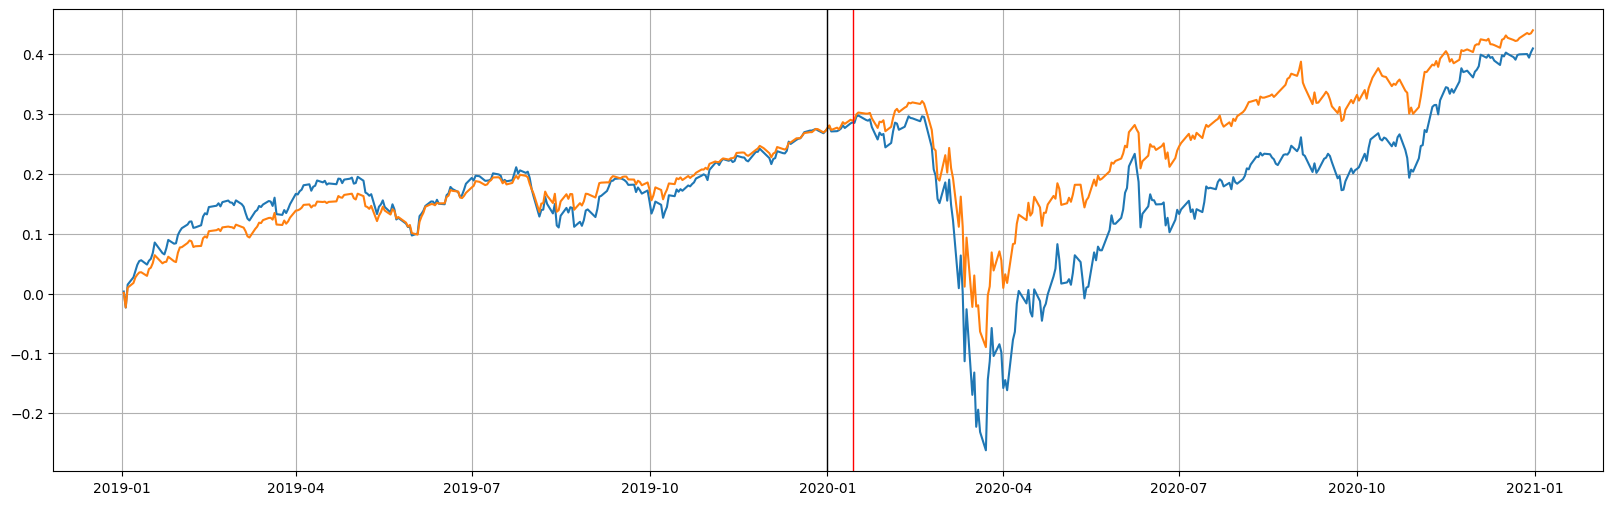

In [11]:
plt.plot((eig1_w * spx_comp_both_year_ret).sum(axis=1).cumsum())
plt.plot(spy_ret.loc[year:next_year].cumsum())
plt.axvline(datetime(int(next_year), 1, 1), c='k', lw=1)
plt.axvline(datetime(int(next_year), 1, 14), c='r', lw=1)
plt.grid()

In [12]:
eig_port = []
eig_port_ret = []

for i in range(5):
    eig_w = pca_year.components_[i] / sum(pca_year.components_[i])
    eig_port.append((eig_w * spx_comp_both_year).sum(axis=1))
    eig_port_ret.append((eig_w * spx_comp_both_year_ret).sum(axis=1))
    
eig_port = pd.DataFrame(eig_port).T
eig_port_ret = pd.DataFrame(eig_port_ret).T
eig_port_ret

,0,1,2,3,4
Date,,,,,
2019-01-02,0.003363,-0.030949,-0.036578,-0.014576,0.137896
2019-01-03,-0.026794,0.001614,-0.019091,0.031038,0.746044
2019-01-04,0.038375,0.008033,0.019491,0.003426,0.196904
2019-01-07,0.012275,-0.109865,0.015841,-0.006455,0.159553
2019-01-08,0.010509,-0.024332,0.018094,0.018629,0.387841
...,...,...,...,...,...
2020-12-24,0.001122,0.006808,0.012698,-0.000938,-0.346607
2020-12-28,0.000536,0.002904,0.008396,0.002048,-0.473094
2020-12-29,-0.006001,-0.009239,0.002025,-0.000807,0.077711


In [13]:
eig_port

,0,1,2,3,4
Date,,,,,
2019-01-02,88.078963,108.246843,159.691455,85.076473,-285.253438
2019-01-03,85.627665,106.634584,156.449861,86.665410,-241.774605
2019-01-04,88.782258,108.616476,160.362368,87.133418,-227.634141
2019-01-07,89.777181,106.736150,162.208800,86.662433,-221.880886
2019-01-08,90.688765,107.050036,164.243664,87.802868,-200.581182
...,...,...,...,...,...
2020-12-24,146.055213,180.992222,315.781736,26.842958,-352.430944
2020-12-28,146.160215,180.981457,316.002970,27.244309,-382.529948
2020-12-29,145.598043,180.718767,315.314575,27.811373,-362.268975


In [14]:
stock = 124
lr = OLS(spx_comp_year.loc[year].iloc[:,stock], eig_port.loc[year]).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      D   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.785e+04
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:44:57   Log-Likelihood:                         -464.96
No. Observations:                 252   AIC:                                      939.9
Df Residuals:                     247   BIC:                                      957.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.3550      0.035     10.082      0.000       0.286       0.424
1              0.0739      0.054      1.369      0.172      -0.032       0.180
2             -0.0400      0.044     -0.911      0.363      -0.126       0.047
3              0.2937      0.025     11.957      0.000       0.245       0.342
4             -0.0049      0.001     -7.409      0.000      -0.006      -0.004
==============================================================================
Omnibus:                        4.280   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.900
Skew:                          -0.236   Prob(JB):                        0.142
Kurtosis:                       2.614   Cond. No.                         606.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
adfuller(lr.resid)[0]

-3.3926450192361344

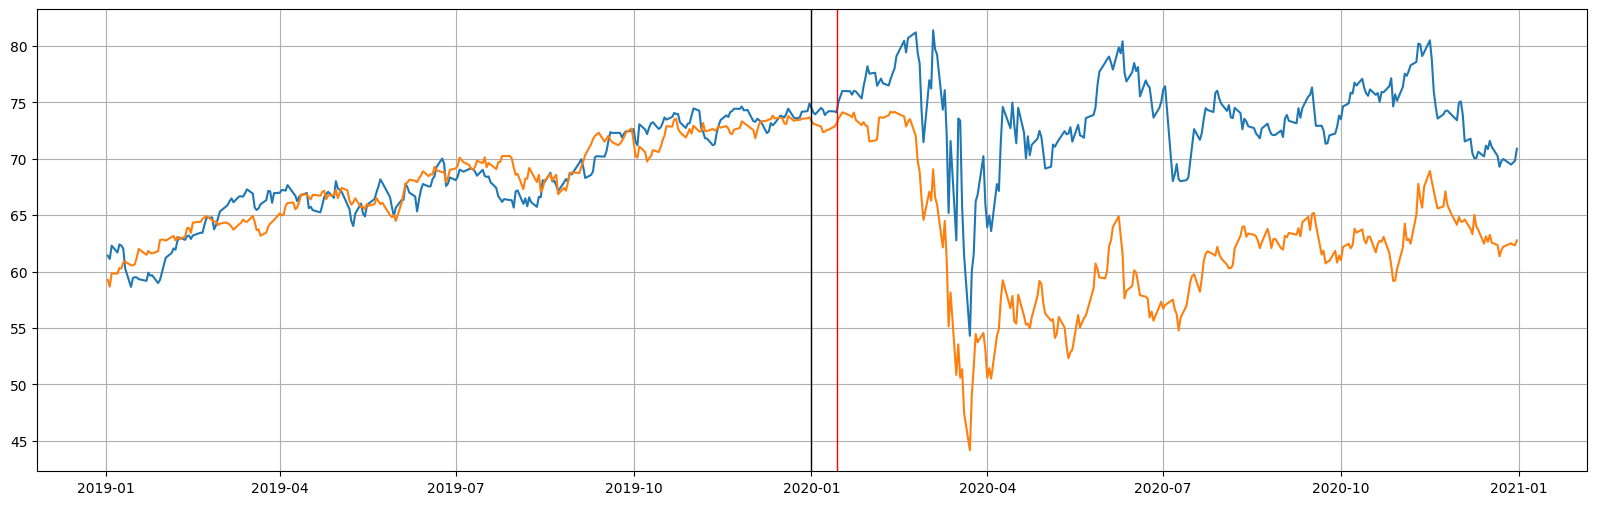

In [16]:
plt.plot(spx_comp_both_year.iloc[:,stock])
plt.plot((lr.params * eig_port).sum(axis=1))
plt.axvline(datetime(int(next_year), 1, 1), c='k', lw=1)
plt.axvline(datetime(int(next_year), 1, 14), c='r', lw=1)
plt.grid()

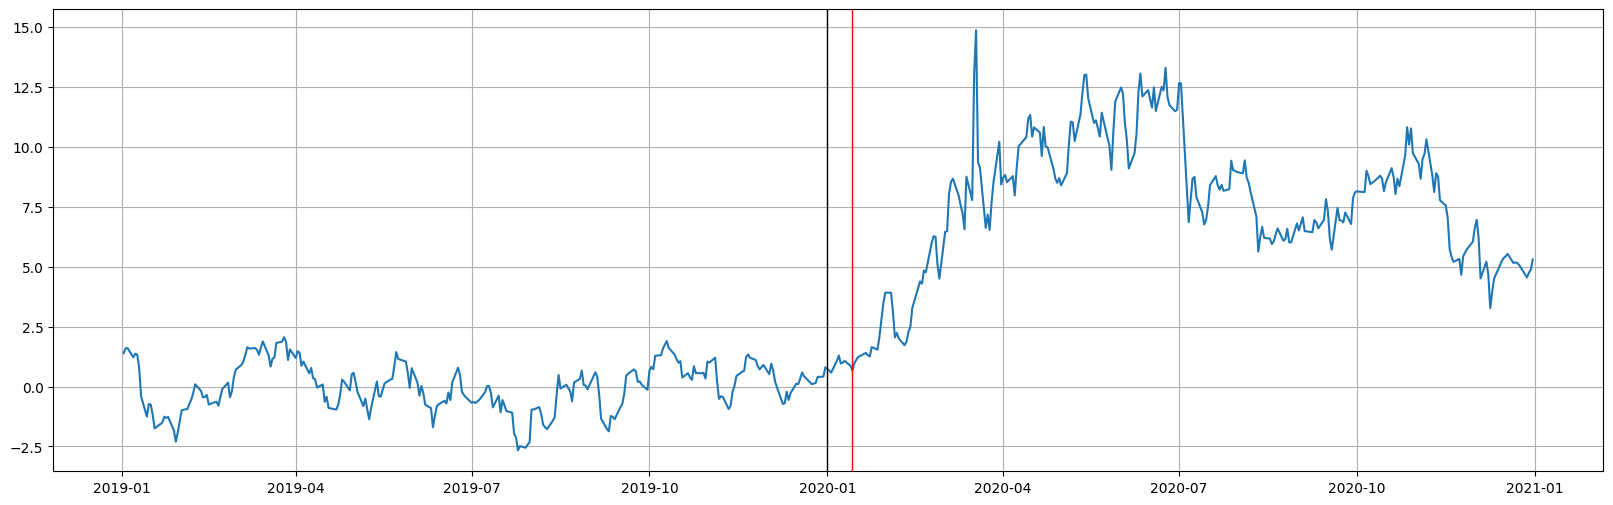

In [17]:
plt.plot((spx_comp_both_year.iloc[:,stock] - (lr.params * eig_port).sum(axis=1))/lr.resid.std())
plt.axvline(datetime(int(next_year), 1, 1), c='k', lw=1)
plt.axvline(datetime(int(next_year), 1, 14), c='r', lw=1)
plt.grid()

<AxesSubplot:>

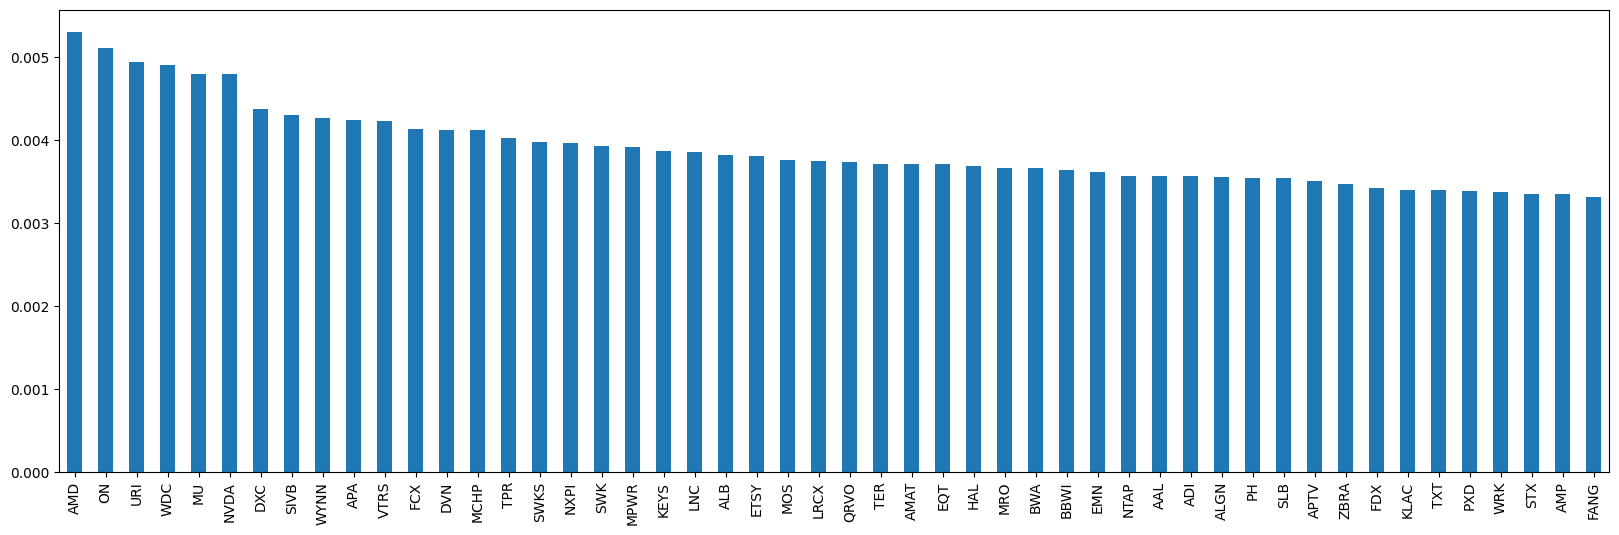

In [18]:
eig1_w.sort_values(ascending=False)[:50].plot.bar()

<AxesSubplot:>

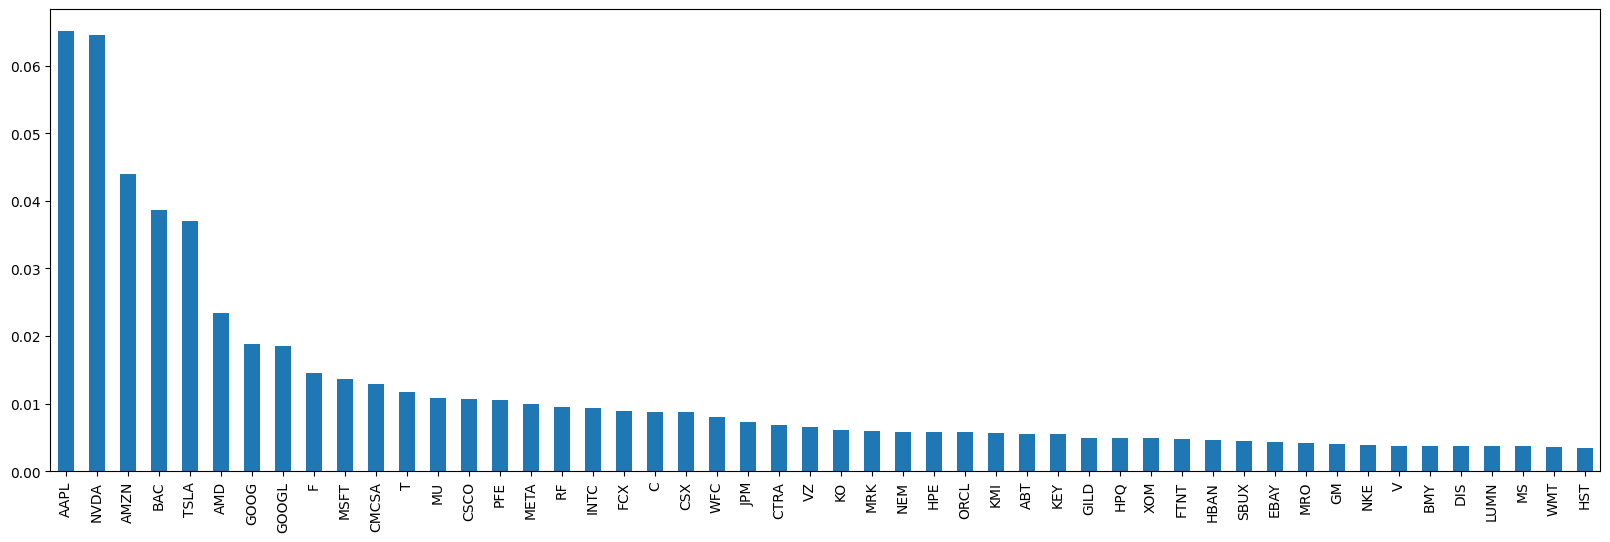

In [19]:
(spx_comp['Volume'].loc['2016-12-30'].sort_values(ascending=False).dropna() / sum(spx_comp['Volume'].loc['2016-12-30'].sort_values(ascending=False).dropna()))[:50].plot.bar()

## SPX

In [20]:
year = '2015'
next_year = '2021'
stock = 3
spy_test = spy.loc[year:next_year]
stock_test = spx_comp_close.loc[year:next_year].iloc[:,stock]
month_list = spy_test.index.to_period('M').unique()
week_list = spy_test.index.to_period('W').unique()

In [21]:
reg_month_cond = ((stock_test.index >= month_list[0].to_timestamp())
                  & (stock_test.index <= month_list[5].to_timestamp('M')))
stock_month = stock_test[reg_month_cond]
spy_month = spy_test[reg_month_cond]

y = np.log(stock_month / stock_month[0])
X = add_constant(np.log(spy_month / spy_month[0]))
coint_reg = OLS(y, X).fit()
coint_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     442.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           2.11e-42
Time:                        22:44:59   Log-Likelihood:                 270.17
No. Observations:                 124   AIC:                            -536.3
Df Residuals:                     122   BIC:                            -530.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0838      0.003     24.785      0.000       0.077       0.090
SPY            2.8773      0.137     21.037      0.000       2.607       3.148
==============================================================================
Omnibus:                        6.314   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.807
Skew:                          -0.486   Prob(JB):                       0.0548
Kurtosis:                       3.421   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
adfuller(coint_reg.resid)[0]

-4.477560117332373

In [23]:
resid_month_cond = ((stock_test.index >= month_list[6].to_timestamp())
                    & (stock_test.index <= month_list[6].to_timestamp('M')))
stock_resid = stock_test[resid_month_cond]
spy_resid = spy_test[resid_month_cond]
stock_pred = coint_reg.params['SPY'] * np.log(spy_resid / spy_month[0]) + coint_reg.params['const']
resid = np.log(stock_resid / stock_month[0]) - stock_pred
s_resid = resid / coint_reg.resid.std()

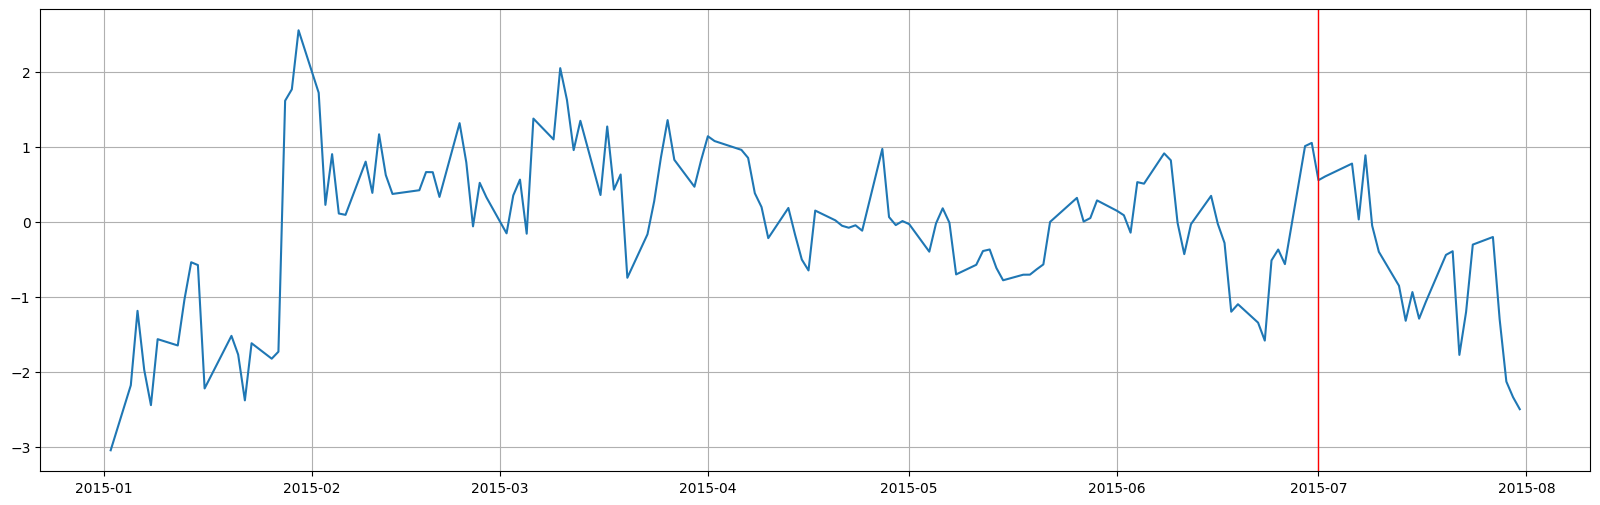

In [24]:
full_resid = pd.concat([coint_reg.resid / coint_reg.resid.std(), s_resid])
plt.plot(full_resid)
plt.axvline(month_list[6].to_timestamp(), c='r', lw=1)
plt.grid()

In [25]:
open_short = -2
close_short = -1
open_long = 2
close_long = 1

In [26]:
resid_open_short = s_resid < open_short
resid_close_short = s_resid > close_short
open_short_sig = ((resid_open_short - resid_open_short.shift()).fillna(0) == 1) * 1
close_short_sig = ((resid_close_short - resid_close_short.shift()).fillna(0) == 1) * -1

In [27]:
short_sig_df = pd.concat([open_short_sig, close_short_sig], axis=1)
short_sig = []
cur_sig = 0
for row in short_sig_df.iterrows():
    cur_sig += row[1].sum()
    if cur_sig > 1: cur_sig = 1
    if cur_sig < -1: cur_sig = -1
    short_sig.append(cur_sig)
short_pos = pd.Series(short_sig, index=short_sig_df.index, name='short').shift().fillna(0)

In [28]:
resid_open_long = s_resid > open_long
resid_close_long = s_resid < close_long
open_long_sig = ((resid_open_long - resid_open_long.shift()).fillna(0) == 1) * 1
close_long_sig = ((resid_close_long - resid_close_long.shift()).fillna(0) == 1) * -1

In [29]:
long_sig_df = pd.concat([open_long_sig, close_long_sig], axis=1)
long_sig = []
cur_sig = 0
for row in long_sig_df.iterrows():
    cur_sig += row[1].sum()
    if cur_sig > 1: cur_sig = 1
    if cur_sig < -1: cur_sig = -1
    long_sig.append(cur_sig)
long_pos = pd.Series(long_sig, index=long_sig_df.index, name='long').shift().fillna(0)

In [30]:
resid_pos = long_pos - short_pos
resid_pos

Date
2015-07-01    0.0
2015-07-02    0.0
2015-07-06    0.0
2015-07-07    0.0
2015-07-08    0.0
2015-07-09    0.0
2015-07-10    0.0
2015-07-13    0.0
2015-07-14    0.0
2015-07-15    0.0
2015-07-16    1.0
2015-07-17    1.0
2015-07-20    1.0
2015-07-21    1.0
2015-07-22    1.0
2015-07-23    1.0
2015-07-24    1.0
2015-07-27    1.0
2015-07-28    1.0
2015-07-29    1.0
2015-07-30    0.0
2015-07-31    0.0
dtype: float64

In [31]:
stock_pos = resid_pos
spy_pos = -resid_pos * coint_reg.params['SPY']
arb_port_month = pd.concat([stock_pos, spy_pos], axis=1)
arb_port_month.columns = [stock_month.name, 'SPY']
arb_port_month

,AAPL,SPY
Date,,
2015-07-01,0.0,-0.000000
2015-07-02,0.0,-0.000000
2015-07-06,0.0,-0.000000
2015-07-07,0.0,-0.000000
2015-07-08,0.0,-0.000000
2015-07-09,0.0,-0.000000
2015-07-10,0.0,-0.000000
2015-07-13,0.0,-0.000000
2015-07-14,0.0,-0.000000


In [32]:
arb_port = pd.DataFrame(columns=[stock_month.name, 'SPY'])
beta_list = []
short_sig_dfs = pd.DataFrame()
long_sig_dfs = pd.DataFrame()
short_pos_df = pd.DataFrame()
long_pos_df = pd.DataFrame()

cur_short_sig = 0
cur_long_sig = 0

open_short = -2
close_short = -1
open_long = 2
close_long = 1

reg_period = 12

for t in range(reg_period, len(month_list)):
    reg_month_cond = ((stock_test.index >= month_list[t-reg_period].to_timestamp())
                      & (stock_test.index <= month_list[t-1].to_timestamp('M')))
    stock_month = stock_test[reg_month_cond]
    spy_month = spy_test[reg_month_cond]

    y = np.log(stock_month / stock_month[0])
    X = add_constant(np.log(spy_month / spy_month[0]))
    coint_reg = OLS(y, X).fit()
    beta_list.append([month_list[t], coint_reg.params['SPY']])
    
    resid_month_cond = ((stock_test.index >= month_list[t].to_timestamp())
                        & (stock_test.index <= month_list[t].to_timestamp('M')))
    stock_resid = stock_test[resid_month_cond]
    spy_resid = spy_test[resid_month_cond]
    stock_pred = coint_reg.params['SPY'] * np.log(spy_resid / spy_month[0]) + coint_reg.params['const']
    resid = np.log(stock_resid / stock_month[0]) - stock_pred
    s_resid = resid / coint_reg.resid.std()
    
    if adfuller(coint_reg.resid)[0] < -2:

        resid_open_short = s_resid < open_short
        resid_close_short = s_resid > close_short
        open_short_sig = ((resid_open_short - resid_open_short.shift()).fillna(0) == 1) * 1
        close_short_sig = ((resid_close_short - resid_close_short.shift()).fillna(0) == 1) * -1

        short_sig_df = pd.concat([open_short_sig, close_short_sig], axis=1)
        short_sig_dfs = pd.concat([short_sig_dfs, short_sig_df])

        short_sig = []
        for row in short_sig_df.iterrows():
            if row[1].sum() == 1 and cur_short_sig == 0: 
                cur_short_sig = 1
            elif row[1].sum() == -1 and cur_short_sig == 1: 
                cur_short_sig = 0
            short_sig.append(cur_short_sig)
        short_pos = pd.Series(short_sig, index=short_sig_df.index, name='short')
        short_pos_df = pd.concat([short_pos_df, short_pos])

        resid_open_long = s_resid > open_long
        resid_close_long = s_resid < close_long
        open_long_sig = ((resid_open_long - resid_open_long.shift()).fillna(0) == 1) * 1
        close_long_sig = ((resid_close_long - resid_close_long.shift()).fillna(0) == 1) * -1

        long_sig_df = pd.concat([open_long_sig, close_long_sig], axis=1)
        long_sig_dfs = pd.concat([long_sig_dfs, long_sig_df])

        long_sig = []
        for row in long_sig_df.iterrows():
            if row[1].sum() == 1 and cur_long_sig == 0: 
                cur_long_sig = 1
            elif row[1].sum() == -1 and cur_long_sig == 1: 
                cur_long_sig = 0
            long_sig.append(cur_long_sig)
        long_pos = pd.Series(long_sig, index=long_sig_df.index, name='long')
        long_pos_df = pd.concat([long_pos_df, long_pos])
        
    else:
        
        cur_short_sig = 0
        cur_long_sig = 0
        short_pos = pd.Series(np.full(len(s_resid), 0), index=s_resid.index)
        long_pos = pd.Series(np.full(len(s_resid), 0), index=s_resid.index)
    
    resid_pos = long_pos - short_pos
    stock_pos = resid_pos
    spy_pos = -resid_pos * coint_reg.params['SPY']
    arb_port_month = pd.concat([stock_pos, spy_pos], axis=1)
    arb_port_month.columns = [stock_month.name, 'SPY']
    arb_port = pd.concat([arb_port, arb_port_month])
    
arb_port = arb_port.shift().fillna(0)

In [38]:
arb_port_w = pd.DataFrame(columns=[stock_test.name, 'SPY'])
beta_list = []
short_sig_dfs = pd.DataFrame()
long_sig_dfs = pd.DataFrame()
short_pos_df = pd.DataFrame()
long_pos_df = pd.DataFrame()

cur_short_sig = 0
cur_long_sig = 0

open_short = -2
close_short = -1
open_long = 2
close_long = 1

reg_period = 52

for t in range(reg_period, len(week_list)):
    reg_week_cond = ((stock_test.index >= week_list[t-reg_period].to_timestamp())
                      & (stock_test.index <= week_list[t-1].to_timestamp('W')))
    stock_week = stock_test[reg_week_cond]
    spy_week = spy_test[reg_week_cond]

    y = np.log(stock_week / stock_week[0])
    X = add_constant(np.log(spy_week / spy_week[0]))
    coint_reg = OLS(y, X).fit()
    beta_list.append([week_list[t], coint_reg.params['SPY']])
    
    resid_week_cond = ((stock_test.index >= week_list[t].to_timestamp())
                        & (stock_test.index <= week_list[t].to_timestamp('W')))
    stock_resid = stock_test[resid_week_cond]
    spy_resid = spy_test[resid_week_cond]
    stock_pred = coint_reg.params['SPY'] * np.log(spy_resid / spy_week[0]) + coint_reg.params['const']
    resid = np.log(stock_resid / stock_week[0]) - stock_pred
    s_resid = resid / coint_reg.resid.std()
    
    if adfuller(coint_reg.resid)[0] < -2:

        resid_open_short = s_resid < open_short
        resid_close_short = s_resid > close_short
        open_short_sig = ((resid_open_short - resid_open_short.shift()).fillna(0) == 1) * 1
        close_short_sig = ((resid_close_short - resid_close_short.shift()).fillna(0) == 1) * -1

        short_sig_df = pd.concat([open_short_sig, close_short_sig], axis=1)
        short_sig_dfs = pd.concat([short_sig_dfs, short_sig_df])

        short_sig = []
        for row in short_sig_df.iterrows():
            if row[1].sum() == 1 and cur_short_sig == 0: 
                cur_short_sig = 1
            elif row[1].sum() == -1 and cur_short_sig == 1: 
                cur_short_sig = 0
            short_sig.append(cur_short_sig)
        short_pos = pd.Series(short_sig, index=short_sig_df.index, name='short')
        short_pos_df = pd.concat([short_pos_df, short_pos])

        resid_open_long = s_resid > open_long
        resid_close_long = s_resid < close_long
        open_long_sig = ((resid_open_long - resid_open_long.shift()).fillna(0) == 1) * 1
        close_long_sig = ((resid_close_long - resid_close_long.shift()).fillna(0) == 1) * -1

        long_sig_df = pd.concat([open_long_sig, close_long_sig], axis=1)
        long_sig_dfs = pd.concat([long_sig_dfs, long_sig_df])

        long_sig = []
        for row in long_sig_df.iterrows():
            if row[1].sum() == 1 and cur_long_sig == 0: 
                cur_long_sig = 1
            elif row[1].sum() == -1 and cur_long_sig == 1: 
                cur_long_sig = 0
            long_sig.append(cur_long_sig)
        long_pos = pd.Series(long_sig, index=long_sig_df.index, name='long')
        long_pos_df = pd.concat([long_pos_df, long_pos])
        
    else:
        
        cur_short_sig = 0
        cur_long_sig = 0
        short_pos = pd.Series(np.full(len(s_resid), 0), index=s_resid.index)
        long_pos = pd.Series(np.full(len(s_resid), 0), index=s_resid.index)
    
    resid_pos = long_pos - short_pos
    stock_pos = resid_pos
    spy_pos = -resid_pos * coint_reg.params['SPY']
    arb_port_week = pd.concat([stock_pos, spy_pos], axis=1)
    arb_port_week.columns = [stock_week.name, 'SPY']
    arb_port_w = pd.concat([arb_port_w, arb_port_week])

arb_port_w = arb_port.shift().fillna(0)

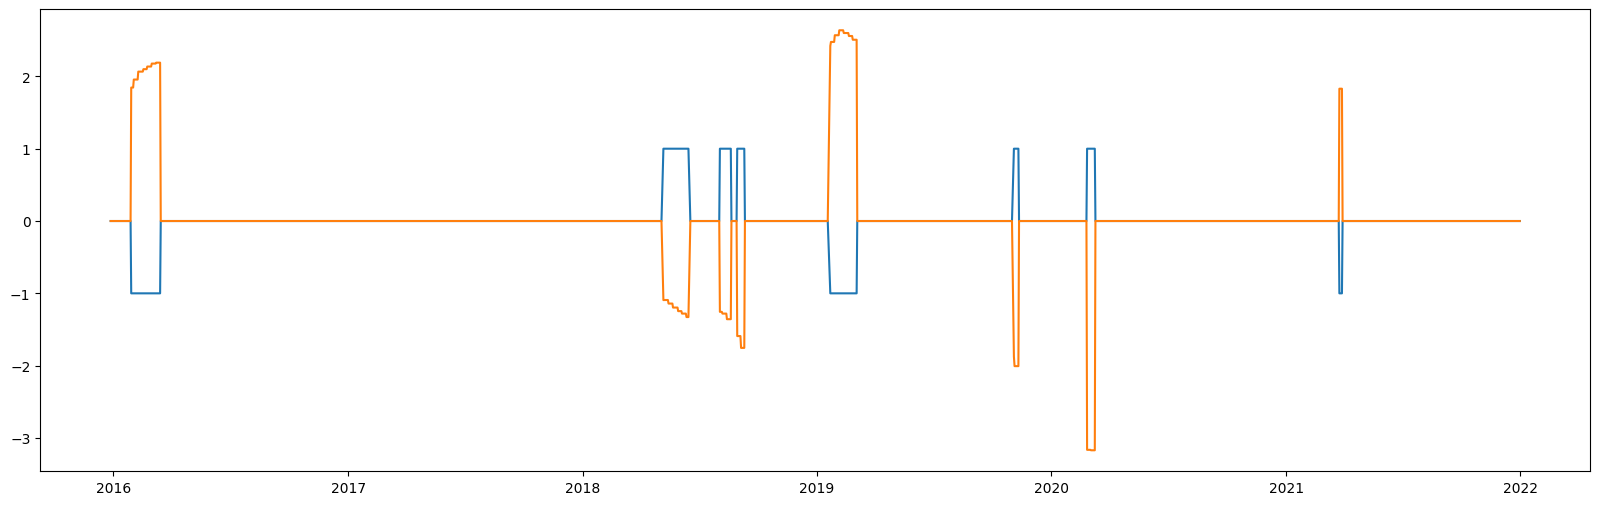

In [34]:
plt.plot(arb_port)

In [35]:
arb_sig = arb_port.diff().fillna(0)
init_val = 1000000 / 20
cash_val = init_val
cur_stock_pos = 0
cur_spy_pos = 0
arb_port_val = []

for t in arb_sig.index:
    cur_stock_pos += arb_sig.loc[t][stock_test.name]
    cur_spy_pos += arb_sig.loc[t]['SPY']
    stock_val = cur_stock_pos * stock_test.loc[t]
    spy_val = cur_spy_pos * spy_test.loc[t]
    cash_val -= arb_sig.loc[t][stock_test.name] * stock_test.loc[t] + arb_sig.loc[t]['SPY'] * spy_test.loc[t]
    port_val = cash_val + stock_val + spy_val
    arb_port_val.append(port_val)
    
arb_port_val = pd.Series(arb_port_val, index=arb_sig.index)

In [36]:
arb_sig

,AAPL,SPY
2015-12-28,0.0,0.0
2015-12-29,0.0,0.0
2015-12-30,0.0,0.0
2015-12-31,0.0,0.0
2016-01-04,0.0,0.0
...,...,...
2021-12-27,0.0,0.0
2021-12-28,0.0,0.0
2021-12-29,0.0,0.0
2021-12-30,0.0,0.0


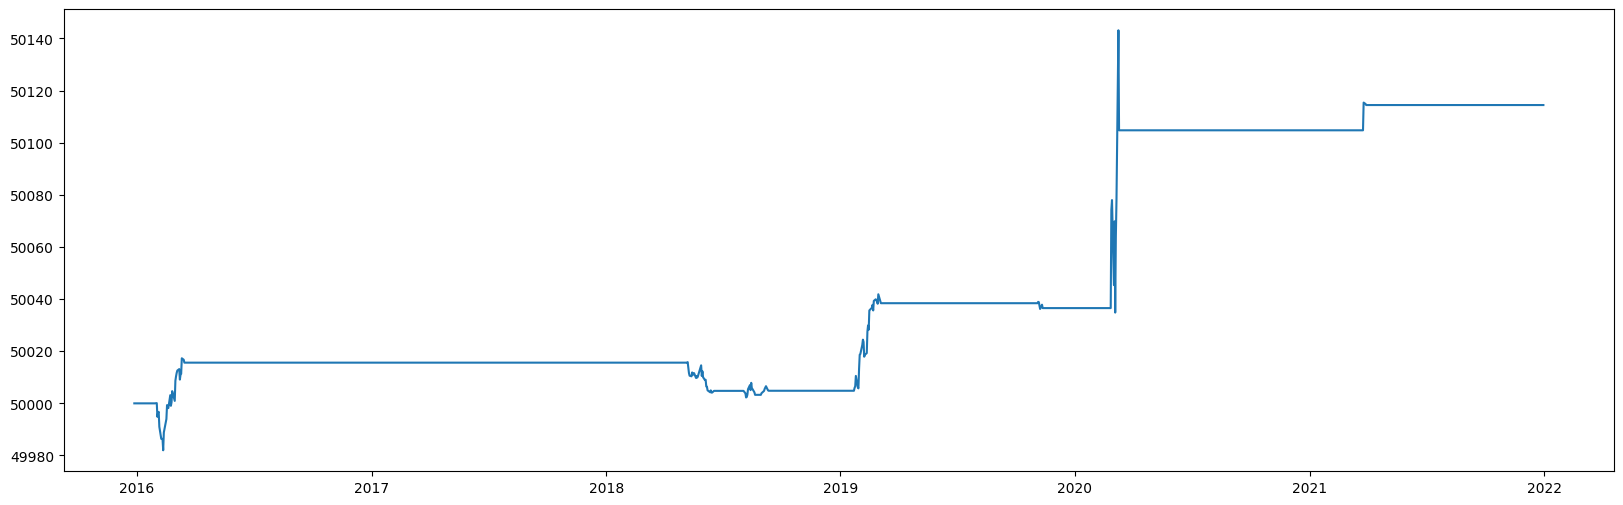

In [37]:
plt.plot(arb_port_val)
